# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [90]:
#  1. Get the total rides for each city type
rides_by_type=pyber_data_df.groupby("type").count()['ride_id']
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [91]:
# 2. Get the total drivers for each city type
drivers_by_type=pyber_data_df.groupby("type").sum()['driver_count']
drivers_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [92]:
#  3. Get the total amount of fares for each city type
fare_by_type=pyber_data_df.groupby("type").sum()["fare"]
fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [93]:
#  4. Get the average fare per ride for each city type. 
ave_fare_ride=fare_by_type/rides_by_type
ave_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [94]:
# 5. Get the average fare per driver for each city type. 
ave_fare_driver=fare_by_type/drivers_by_type
ave_fare_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [187]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({"Total Rides": rides_by_type,
    "Total Drivers": drivers_by_type,
    "Total Fares": fare_by_type,
    "Average Fare per Ride": ave_fare_ride,
    "Average Fare per Driver": ave_fare_driver   
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [188]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [189]:
#  8. Format the columns.
import locale as lc
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].apply(lambda x: f"${x:.2f}")
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].apply(lambda x: f"${x:.2f}")
#pyber_summary_df['Total Rides'] = pyber_summary_df.apply(lambda x: "{:,}".format(x['Total Rides']),axis=1)
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].apply(lambda x: f"${x}")
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [199]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [220]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df=pyber_data_df.groupby(["type","date"]).sum(['fare'])
df

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4
...                          ...            ...           ...
Urban 2019-05-08 04:20:00  21.99   117997692054            52
      2019-05-08 04:39:49  18.45  1811574736337            11
      2019-05-08 07:29:01  18.55  5682021476085            33
      2019-05-08 11:38:35  19.77  7837163332630             4
      2019-05-08 13:10:18  18.04  5616262558026            58

[2375 rows x 3 columns]

In [223]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()
df

,date,type,fare,ride_id,driver_count
0,2019-01-01 09:45:36,Rural,43.69,2424875833354,1
1,2019-01-02 11:18:32,Rural,52.12,3454018971635,1
2,2019-01-03 19:51:01,Rural,19.90,5559509612597,8
3,2019-01-04 03:31:26,Rural,24.88,4195619112933,8
4,2019-01-06 07:38:40,Rural,47.33,3849747342021,4
...,...,...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99,117997692054,52
2371,2019-05-08 04:39:49,Urban,18.45,1811574736337,11
2372,2019-05-08 07:29:01,Urban,18.55,5682021476085,33
2373,2019-05-08 11:38:35,Urban,19.77,7837163332630,4


In [232]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_fare=df.pivot(index='date', columns='type', values='fare')

In [239]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df_2019=df_fare.loc['2019-01-01':'2019-04-29']
df_2019

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [240]:
type(df_2019.index)

pandas.core.indexes.base.Index

In [242]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df_2019.index = pd.to_datetime(df_2019.index)

In [243]:
# 7. Check that the datatype for the index is datetime using df.info()
df_2019.info()
type(df_2019.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


pandas.core.indexes.datetimes.DatetimeIndex

In [245]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_resample=df_2019.resample('W').sum()
df_resample

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


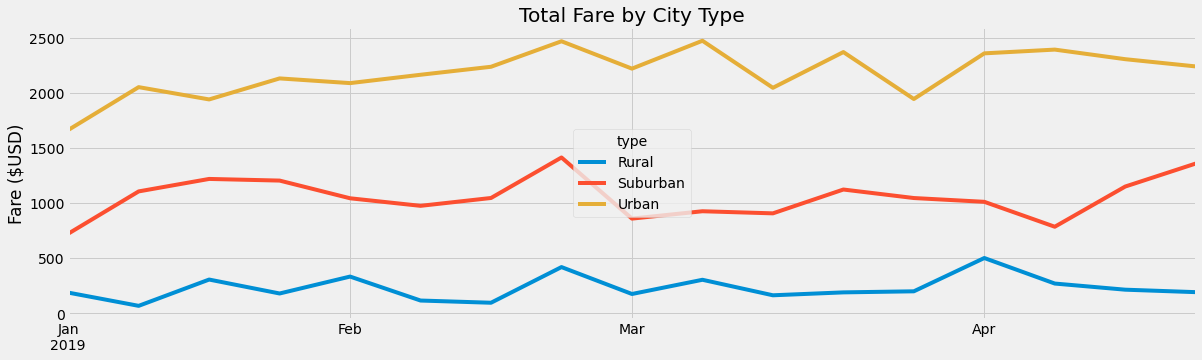

In [262]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

df_resample.plot(figsize=(18,5))
plt.xlabel('')
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')

plt.savefig('analysis/Pyber_fare_summary.png');


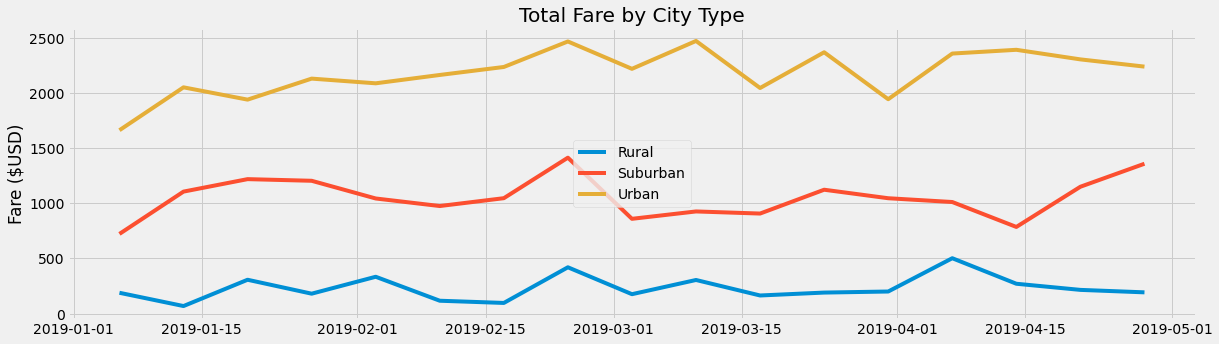

In [265]:
fig, ax = plt.subplots(figsize=(18,5))

x = df_resample.index

# now there's 3 sets of points
y1 = df_resample['Rural']
y2 = df_resample['Suburban']
y3 = df_resample['Urban']

# plot the 3 sets
plt.plot(x,y1, label='Rural')
plt.plot(x,y2, label='Suburban')
plt.plot(x,y3, label='Urban')

plt.xlabel('')
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')

# call with no parameters
plt.legend()
plt.show()